<a href="https://colab.research.google.com/github/GiovaniMicheloni/mlearning-w-python/blob/main/base_census3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

base censo com algoritmo DecisionTreeClassifier

In [1]:
!pip -q install plotly

In [2]:
!pip -q install yellowbrick

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
base_censu = pd.read_csv('/content/census.csv')

In [6]:
base_censu

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
base_censu.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
base_censu.isnull().sum()

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [9]:
np.unique(base_censu['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [10]:
x_censu = base_censu.iloc[:, 0:14].values

In [11]:
x_censu

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [12]:
y_censu = base_censu.iloc[:,14].values

In [13]:
y_censu

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder_test = LabelEncoder()

In [16]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [17]:
x_censu[:,1] = label_encoder_workclass.fit_transform(x_censu[:,1])
x_censu[:,3] = label_encoder_education.fit_transform(x_censu[:,3])
x_censu[:,5] = label_encoder_marital.fit_transform(x_censu[:,5])
x_censu[:,6] = label_encoder_occupation.fit_transform(x_censu[:,6])
x_censu[:,7] = label_encoder_relationship.fit_transform(x_censu[:,7])
x_censu[:,8] = label_encoder_race.fit_transform(x_censu[:,8])
x_censu[:,9] = label_encoder_sex.fit_transform(x_censu[:,9])
x_censu[:,13] = label_encoder_country.fit_transform(x_censu[:,13])

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
from sklearn.compose import ColumnTransformer

In [20]:
onehotenconder_censu = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [21]:
x_censu = onehotenconder_censu.fit_transform(x_censu).toarray()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_censu_treinamento, x_censu_teste, y_censu_treinamento, y_censu_teste = train_test_split(x_censu, y_censu, test_size = 0.15, random_state = 0)


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
arvore_census = DecisionTreeClassifier(criterion ='entropy', random_state=0)

In [27]:
arvore_census.fit(x_censu_treinamento, y_censu_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
previsoes= arvore_census.predict(x_censu_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_censu_teste, previsoes)

0.8102354145342886

0.8102354145342886

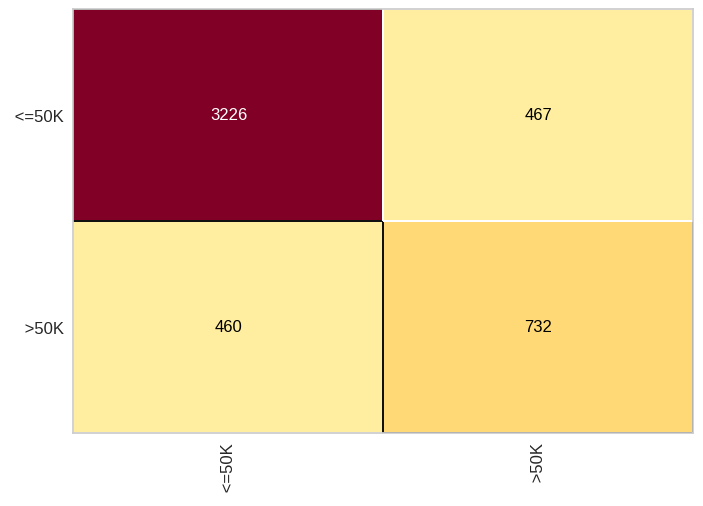

In [33]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(x_censu_treinamento, y_censu_treinamento)
cm.score(x_censu_teste,y_censu_teste)


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_censu_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885

